In [1]:
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv(r'S50Z21_tf_15.csv')
df.head(20)

,Timestamp,S50Z21.Open,S50Z21.High,S50Z21.Low,S50Z21.Close,STD,"EMAV(C,14)"
0,17/06/21 10:30:00,970.1,973.0,969.9,973.0,-,-
1,17/06/21 10:45:00,972.9,975.4,972.5,973.8,-,-
2,17/06/21 11:00:00,973.7,974.0,972.3,972.3,-,-
3,17/06/21 11:15:00,972.6,973.4,972.2,973.4,-,-
4,17/06/21 11:30:00,973.3,973.4,973.0,973.4,-,-
5,17/06/21 11:45:00,973.2,973.5,973.2,973.5,-,-
6,17/06/21 12:00:00,973.5,974.1,972.0,972.2,-,-
7,17/06/21 12:15:00,972.3,973.2,972.3,973.2,-,-
8,17/06/21 14:15:00,972.2,972.9,971.5,971.5,-,-
9,17/06/21 14:30:00,971.4,973.1,971.0,972.9,-,-


In [3]:
df.rename(columns = {'Timestamp':'Time','S50Z21.Open':'Open','S50Z21.High':'High','S50Z21.Low':'Low','S50Z21.Close':'Close'},inplace = True)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        300 non-null    object 
 1   Open        300 non-null    float64
 2   High        300 non-null    float64
 3   Low         300 non-null    float64
 4   Close       300 non-null    float64
 5   STD         300 non-null    object 
 6   EMAV(C,14)  300 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


In [5]:
df.set_index('Time')

,Open,High,Low,Close,STD,"EMAV(C,14)"
Time,,,,,,
17/06/21 10:30:00,970.1,973.0,969.9,973.0,-,-
17/06/21 10:45:00,972.9,975.4,972.5,973.8,-,-
17/06/21 11:00:00,973.7,974.0,972.3,972.3,-,-
17/06/21 11:15:00,972.6,973.4,972.2,973.4,-,-
17/06/21 11:30:00,973.3,973.4,973.0,973.4,-,-
...,...,...,...,...,...,...
6/7/21 14:30,948.4,948.7,947.1,947.6,3.0411,947.9565
6/7/21 14:45,947.3,948.7,947.3,947.5,1.4686,947.8956
6/7/21 15:00,947.5,948.3,947.0,947.9,1.4686,947.8962


In [6]:
data = df.filter(regex='Open|High|Low|Close')

In [7]:
data

,Open,High,Low,Close
0,970.1,973.0,969.9,973.0
1,972.9,975.4,972.5,973.8
2,973.7,974.0,972.3,972.3
3,972.6,973.4,972.2,973.4
4,973.3,973.4,973.0,973.4
...,...,...,...,...
295,948.4,948.7,947.1,947.6
296,947.3,948.7,947.3,947.5
297,947.5,948.3,947.0,947.9
298,947.8,949.4,947.8,949.0


In [8]:
data.shape

(300, 4)

In [9]:
dataset = data.values

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [11]:
scaler = MinMaxScaler()

In [12]:
training_data = scaler.fit_transform(dataset)
training_data

array([[0.89442815, 0.93063584, 0.90350877, 0.97660819],
       [0.97653959, 1.        , 0.97953216, 1.        ],
       [1.        , 0.95953757, 0.97368421, 0.95614035],
       ...,
       [0.23167155, 0.21676301, 0.23391813, 0.24269006],
       [0.24046921, 0.24855491, 0.25730994, 0.2748538 ],
       [0.27272727, 0.23410405, 0.28070175, 0.26608187]])

In [13]:
dat = dataset[:,0].reshape(-1,1)

In [14]:
dat

array([[970.1],
       [972.9],
       [973.7],
       [972.6],
       [973.3],
       [973.2],
       [973.5],
       [972.3],
       [972.2],
       [971.4],
       [972.7],
       [971.9],
       [972.6],
       [971. ],
       [969.5],
       [970.6],
       [968.3],
       [968.2],
       [968. ],
       [970.1],
       [967.6],
       [965.1],
       [966.3],
       [965.4],
       [965.4],
       [964.6],
       [964.2],
       [963.8],
       [962.5],
       [962.5],
       [961.2],
       [963. ],
       [963.7],
       [965. ],
       [966.8],
       [967. ],
       [966.1],
       [966. ],
       [965.1],
       [967.4],
       [966. ],
       [954. ],
       [955. ],
       [953. ],
       [953.9],
       [951. ],
       [950.6],
       [952.2],
       [951.6],
       [951.9],
       [952.9],
       [951.6],
       [953. ],
       [954.4],
       [957. ],
       [956.4],
       [956.6],
       [955.9],
       [956. ],
       [955.9],
       [956.3],
       [955.9],
       [

In [15]:
sc = MinMaxScaler()
dat = sc.fit_transform(dat)

In [16]:
features = training_data
target = training_data[:,0] #ราคาopen

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
TimeseriesGenerator(features, target,length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.89442815, 0.93063584, 0.90350877, 0.97660819],
         [0.97653959, 1.        , 0.97953216, 1.        ]]]),
 array([1.]))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 123, shuffle = False)

In [20]:
x_train.shape[1]

4

In [21]:
x_test.shape

(90, 4)

In [22]:
y_test.shape

(90,)

In [23]:
look_back = 30
batch_size = 32
num_feture = x_train.shape[1]

In [24]:
train_generator = TimeseriesGenerator(x_train, y_train,length=look_back, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test,length=look_back, sampling_rate=1, batch_size=batch_size)

In [25]:
test_generator

In [26]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
model = Sequential()

In [28]:
model.add(LSTM(128, input_shape=(look_back, num_feture),return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM( 64, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit_generator(train_generator, epochs=100).history
model.save('lstm_model_multi.h5')

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
6/6 [==============================] - 18s 52ms/step - loss: 0.0407
Epoch 2/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0175
Epoch 3/100
6/6 [==============================] - 0s 46ms/step - loss: 0.0192
Epoch 4/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0140
Epoch 5/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0127
Epoch 6/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0172
Epoch 7/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0128
Epoch 8/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0106
Epoch 9/100
6/6 [==============================] - 0s 48ms/step - loss: 0.0111
Epoch 10/100
6/6 [==============================] - 0s 50ms/step - loss: 0.0156
Epoch 11/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0106
Epoch 12/100
6/6 [==============================] - 0s 49ms/step - loss: 0.0105
Epoch 13/100
6/6 [==============================

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           68096     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 249,153
Trainable params: 249,153
Non-trainable params: 0
__________________________________________________

In [30]:
predictions = model.predict_generator(test_generator)

/Users/oat/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [31]:
predictions.shape[0]

60

In [32]:
y_test

array([0.2170088 , 0.20234604, 0.17888563, 0.18181818, 0.16422287,
       0.14662757, 0.18475073, 0.18768328, 0.228739  , 0.18475073,
       0.17008798, 0.23167155, 0.19941349, 0.22580645, 0.20527859,
       0.19648094, 0.22580645, 0.23753666, 0.31085044, 0.37243402,
       0.35190616, 0.3372434 , 0.36070381, 0.39002933, 0.35777126,
       0.35190616, 0.37829912, 0.3372434 , 0.33431085, 0.30791789,
       0.26392962, 0.26099707, 0.20234604, 0.19354839, 0.23753666,
       0.18475073, 0.16715543, 0.17595308, 0.17302053, 0.09970674,
       0.07331378, 0.09677419, 0.08211144, 0.12903226, 0.08797654,
       0.09384164, 0.06744868, 0.03225806, 0.        , 0.04105572,
       0.07331378, 0.04105572, 0.07624633, 0.05571848, 0.04398827,
       0.04105572, 0.04105572, 0.07624633, 0.10557185, 0.09677419,
       0.04985337, 0.07038123, 0.03812317, 0.08504399, 0.02052786,
       0.04692082, 0.06451613, 0.07624633, 0.13782991, 0.12903226,
       0.08797654, 0.1085044 , 0.1143695 , 0.17302053, 0.24633

In [33]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.029003932840548387

In [34]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][look_back:])], axis=1)

In [35]:
df_pred

,0,0,1,2
0,0.294456,0.251445,0.239766,0.269006
1,0.272567,0.242775,0.198830,0.204678
2,0.250232,0.187861,0.169591,0.192982
3,0.223674,0.208092,0.204678,0.245614
4,0.217774,0.199422,0.195906,0.187135
5,0.214942,0.156069,0.181287,0.163743
6,0.202934,0.156069,0.175439,0.181287
7,0.192457,0.153179,0.181287,0.175439
8,0.186809,0.135838,0.096491,0.102339
9,0.166937,0.083815,0.087719,0.087719


In [36]:
rev_trans = scaler.inverse_transform(df_pred)

In [37]:
open_pred = rev_trans[:,0]

In [38]:
open_pred = open_pred.reshape(-1,1)

In [39]:
open_pred

array([[949.64096197],
       [948.89452061],
       [948.13291666],
       [947.22729608],
       [947.02609759],
       [946.92953366],
       [946.52003303],
       [946.16277728],
       [945.97017584],
       [945.29255961],
       [944.35970278],
       [943.62233356],
       [943.05139559],
       [942.96557555],
       [943.0857172 ],
       [943.04010089],
       [942.96732352],
       [942.58667042],
       [941.82869122],
       [941.21916766],
       [941.19307534],
       [941.58623998],
       [941.99674136],
       [941.98782394],
       [941.91390379],
       [941.76057873],
       [941.46313694],
       [941.49439428],
       [941.91357096],
       [942.47506128],
       [942.65973794],
       [942.53827769],
       [942.26842149],
       [942.12808702],
       [941.89064365],
       [941.59997904],
       [941.47860187],
       [941.62451712],
       [942.29983736],
       [943.1068493 ],
       [943.4668083 ],
       [943.5595572 ],
       [943.51830063],
       [943

In [40]:
len(open_pred)

60

In [41]:
df.tail(len(open_pred))

,Time,Open,High,Low,Close,STD,"EMAV(C,14)"
240,2/7/21 10:00,948.6,949.5,947.2,948.8,2.5589,949.9692
241,2/7/21 10:15,948.5,949.2,945.8,946.6,3.3689,949.52
242,2/7/21 10:30,946.5,947.3,944.8,946.2,3.9868,949.0773
243,2/7/21 10:45,946.2,948.0,946.0,948.0,4.0833,948.9337
244,2/7/21 11:00,947.7,947.7,945.7,946.0,4.5421,948.5425
245,2/7/21 11:15,945.9,946.2,945.2,945.2,4.9442,948.0969
246,2/7/21 11:30,945.3,946.2,945.0,945.8,4.876,947.7906
247,2/7/21 11:45,945.6,946.1,945.2,945.6,4.8673,947.4985
248,2/7/21 12:00,945.5,945.5,942.3,943.1,5.2076,946.9121
249,2/7/21 12:15,943.0,943.7,942.0,942.6,5.0726,946.3371


In [42]:
gg = pd.DataFrame(df.iloc[240:,1])
gg['prediction'] = open_pred

In [43]:
gg

,Open,prediction
240,948.6,949.640962
241,948.5,948.894521
242,946.5,948.132917
243,946.2,947.227296
244,947.7,947.026098
245,945.9,946.929534
246,945.3,946.520033
247,945.6,946.162777
248,945.5,945.970176
249,943.0,945.292560


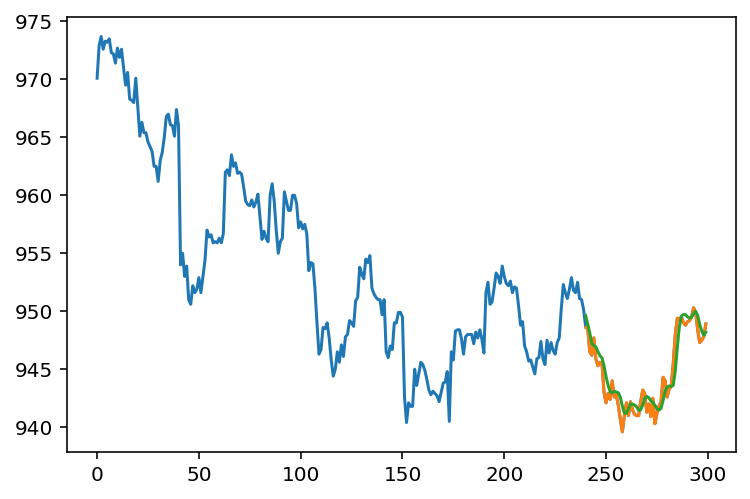

In [44]:
plt.plot(df['Open'])
plt.plot(gg['Open'])
plt.plot(gg['prediction'])

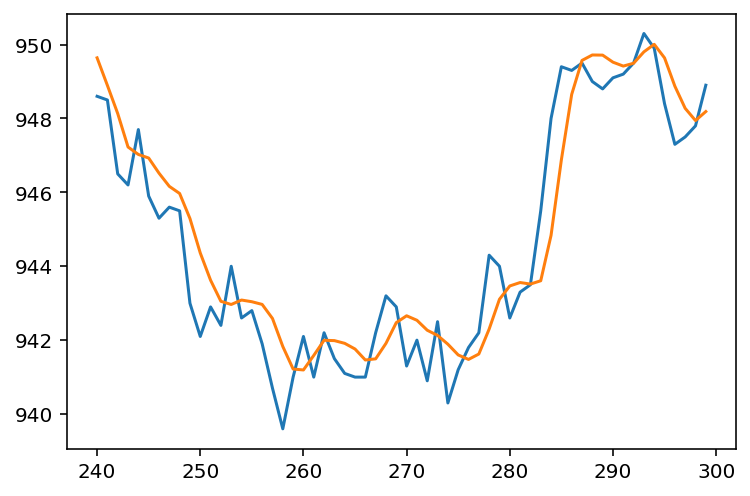

In [45]:
#ZOOM
plt.plot(gg['Open'])
plt.plot(gg['prediction'])

In [46]:
dataset[-look_back:]

array([[941.3, 942.3, 941.3, 941.9],
       [942. , 942. , 941.1, 941.3],
       [940.9, 943. , 940.8, 942.4],
       [942.5, 942.8, 939.6, 940.7],
       [940.3, 941.6, 940.1, 941.2],
       [941.2, 941.9, 940.6, 941.6],
       [941.8, 942.3, 941.4, 942.1],
       [942.2, 944.9, 942.2, 944.2],
       [944.3, 944.3, 943.2, 943.6],
       [944. , 944. , 942.1, 942.5],
       [942.6, 943.7, 942.5, 943.4],
       [943.3, 943.6, 942. , 943.5],
       [943.5, 943.9, 943.3, 943.6],
       [945.5, 948.7, 945.5, 947.9],
       [948. , 950. , 947.7, 949.4],
       [949.4, 950.1, 948.7, 949. ],
       [949.3, 949.8, 948.7, 949.2],
       [949.5, 949.5, 948.1, 949.1],
       [949. , 950.5, 948.8, 948.8],
       [948.8, 949.2, 948.6, 949.1],
       [949.1, 949.4, 949. , 949. ],
       [949.2, 949.9, 949. , 949.5],
       [949.5, 950.5, 949.5, 950. ],
       [950.3, 950.4, 949.3, 949.7],
       [949.9, 950.3, 947.5, 948.4],
       [948.4, 948.7, 947.1, 947.6],
       [947.3, 948.7, 947.3, 947.5],
 

In [47]:
last_days = dataset[-look_back:]

In [48]:
len(last_days)

30

In [49]:
scaler = MinMaxScaler()

In [50]:
test_data = scaler.fit_transform(last_days)

In [51]:
test_data.shape[1]

4

In [52]:
X_test = test_data[:,:]
Y_test = test_data[:,0]

In [53]:
X_test.shape

(30, 4)

In [54]:
X_test = X_test.reshape(1,look_back,num_feture)

In [55]:
y_hat = model.predict(X_test)

In [56]:
y_hat.shape

(1, 1)

# Invert tranfrom

In [57]:
y_hat

array([[0.82905674]], dtype=float32)

In [58]:
y_hat.shape

(1, 1)

In [59]:
y_hat = sc.inverse_transform(y_hat)

In [60]:
y_hat

array([[967.8708]], dtype=float32)